## Assignment1 TCSS455-ML Stats Problems & Creation Of ID3 Decision Tree for the Titanic DataSet
- Gregory Hablutzel
- 10/18/20

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Part 1: Easing into data analysis with some statistical warm up exercises ..

# Q1. Suppose that the values for a given set of data are grouped into intervals. The intervals and corresponding frequencies are as follows. (3 points)
- Output your Answer as Q1_answer.txt in the output directory:

In [2]:
## Q1 Find approximate median value of age
# -------------------------------------------
# https://numpy.org/doc/stable/reference/generated/numpy.median.html

values = []

for x in range(200):
    values.append(1)
for x in range(450):
    values.append(5)
for x in range(300):
    values.append(15)
for x in range(1500):
    values.append(20)
for x in range(700):
    values.append(50)
for x in range(44):
    values.append(80)
#print (values)
print("The approximate-median value interval starts with:", np.median(values))
print("Thus the approximate median value of age is the range: 20-50")

# The Approximate median value of age is 20-50

The approximate-median value interval starts with: 20.0
Thus the approximate median value of age is the range: 20-50


# Q2. Suppose that the data for analysis includes the attribute age. The age values for the data tuples are (in increasing order) 13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70. (please copy these values correctly in your input or the calculation will be wrong) (7 points)
- Cut Paste your answers to a file Q2_answer.txt and put it in the output directory..

In [3]:
## Q2: Analyize the data:
Q2RawData = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52,
70] 
print(Q2RawData)

[13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]


### (a) What is the mean of the data? What is the median?

In [4]:
Q2Mean = np.mean(Q2RawData)
print("Mean is:", Q2Mean)
Q2Median = np.median(Q2RawData)
print("Median is:", Q2Median)

Mean is: 29.962962962962962
Median is: 25.0


## (b) What is the mode of the data? Comment on the data's modality (i.e., bimodal, trimodal, etc.).

Mode is: 25
We can see that this data is tri-modal, as there are 3 distinct 'humps' on a super-imposed outline of the edges of the histogram


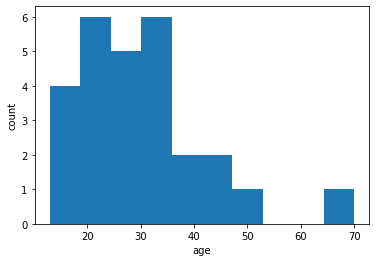

In [5]:
import statistics
# https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list
Q2Mode = statistics.mode(Q2RawData)
print("Mode is:", Q2Mode)

# To view modality, we need to make a histogram
# https://stackoverflow.com/questions/33203645/how-to-plot-a-histogram-using-matplotlib-in-python-with-a-list-of-data
%matplotlib inline
plt.hist(Q2RawData, density=False)  # `density=False` would make counts
plt.ylabel('count')
plt.xlabel('age');
#impo
print ("We can see that this data is tri-modal, as there are 3 distinct 'humps' on a super-imposed outline of the edges of the histogram")

## (c) What is the midrange of the data?

In [6]:
# https://www.statisticshowto.com/midrange-definition-use/
Q2Max = np.max(Q2RawData)
print("Max is:", Q2Max)
Q2Min = np.min(Q2RawData)
print("Max is:", Q2Min)
Q2MidRange = Q2Max / Q2Min
print("MidRange is:", Q2MidRange)



Max is: 70
Max is: 13
MidRange is: 5.384615384615385


## (d) Can you find (roughly) the first quartile (Q1) and the third quartile (Q3) of the data?

In [7]:
# https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/
# https://stackoverflow.com/questions/42049147/convert-list-to-pandas-dataframe-column
# Q1 is the lowest 25% of data, Q3 is the lowest 75% of data.
# Pandas can calculate this for us
import pandas as pd
df = pd.DataFrame({'Age':Q2RawData})
print (df)
print("Q1 is:", 20.5)
print("Q3 is:", 35.0)
df.describe()

    Age
0    13
1    15
2    16
3    16
4    19
5    20
6    20
7    21
8    22
9    22
10   25
11   25
12   25
13   25
14   30
15   33
16   33
17   35
18   35
19   35
20   35
21   36
22   40
23   45
24   46
25   52
26   70
Q1 is: 20.5
Q3 is: 35.0


,Age
count,27.000000
mean,29.962963
std,12.942124
min,13.000000
25%,20.500000
50%,25.000000
75%,35.000000
max,70.000000


## (e) Give the five-number summary of the data.

In [8]:
# https://www.thoughtco.com/what-is-the-five-number-summary-3126237
# The Five Number Summary is:
#    Min, Q1, Median, Q3, Max
# - We can re-use our dataframe and pandas's describe() method used in part d) to calculate some of this.
median = np.median(Q2RawData)
print("Min is:", 13)
print("Q1 is:", 20.5)
print("Median is:", median)
print("Q3 is:", 35.0)
print("Max is:", 70)
df.describe()

Min is: 13
Q1 is: 20.5
Median is: 25.0
Q3 is: 35.0
Max is: 70


,Age
count,27.000000
mean,29.962963
std,12.942124
min,13.000000
25%,20.500000
50%,25.000000
75%,35.000000
max,70.000000


## (f) Show a boxplot of the data.

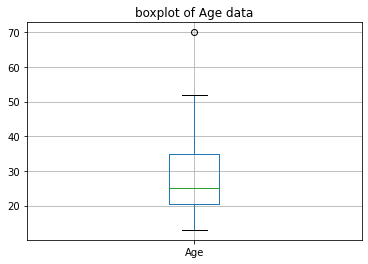

In [9]:
# https://nickmccullum.com/python-visualization/boxplot/
plt.title("boxplot of Age data") 
df.boxplot()
plt.show()
#plt.boxplot(df)

# (g) How is a quantile-quantile plot different from a quantile plot?


    
- A quantile-quantile plot (QQ-Plot), is also called a Normal Quantile Plot.
    - The Normal Quantile Plot is created by comparing the quantiles of a Normal distribution with the quantiles of the data distribution.
    - It can tell you if your data is **normally distributed** (and thus, if will show if it's skewed, and in which direction).
- A Quantile plot (Q-Plot)
    - This is just a graph of all of the quantiles of your data points.
----

- Sources:
    - https://www.coursehero.com/file/p10cvg7b/g-How-is-a-quantile-quantile-plot-different-from-a-quantile-plot-A-quantile/
    - https://www.youtube.com/watch?v=okjYjClSjOg
    - https://www.youtube.com/watch?v=X9_ISJ0YpGw

# Q3. Using the data for age given in question 2, answer the following: (10 points)

## (a) Use min-max normalization to transform the value 35 for age onto the range [0:0; 1:0]. (3 points)

In [10]:
# https://t4tutorials.com/min-max-normalization-of-data-in-data-mining/

def calcMinMax(Value, Min, Max, NewMin, NewMax):
    return ((Value-Min)/(Max-Min)*(NewMax-NewMin)+NewMin)

# Vals: 13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70.
Value = 35
Min = 13
Max = 70
NewMin = 0
NewMax = 1
minMax = calcMinMax(Value, Min, Max, NewMin, NewMax)
print("minMax for 35 is:", minMax)

minMax for 35 is: 0.38596491228070173


## (b) Use z-score normalization to transform the value 35 for age, where the standard deviation of age is 12.94 years. (3 points)

In [11]:
# https://t4tutorials.com/z-score-normalization-data-mining/

def calcZScore(val, mean, sd):
    return (val-mean)/(sd)

zScoreNorm = calcZScore(35, 29.962963, 12.94)
print("z-score normalization of 35 is:", zScoreNorm)

z-score normalization of 35 is: 0.3892609737248842


## (c) Use normalization by decimal scaling to transform the value 35 for age. (3 points)

In [12]:
# https://t4tutorials.com/decimal-scaling-normalization-in-data-mining/
def decimalScaleAVal(val):
    while (val > 1):
        val = val/10
    return val
        
decimalScale = decimalScaleAVal(35)

print("Decimal scaling transformation of 35 is:", decimalScale)


Decimal scaling transformation of 35 is: 0.35


## (d) Comment on which method you would prefer to use for the given data, giving reasons as to why. (1 point)

- Outliers:
    - Both decimal scaling and min-max normalization are not efficient at handling outliers.
    - Z-score normalization is better for dealing with outliers.
- Scaling:
    - min-max normalization applies the same scale to every feature.
    - decimal scaling does have some variation, as it can divide by various powers of 10.
    - However, z-score normalization has a more varied normalization technique that is not as consistent, which is better.
  ---  
  
- Overall, for the better handling of outliers, I would pick **Z-Score Normalization**
    - In addition, we can tell this data set already has outliers by looking at the box plot, so Z-Score Normalization is a good fit here.

----

- Sources:
    - https://t4tutorials.com/min-max-normalization-of-data-in-data-mining/

# ---------------------------------------------------
# ---------------------------------------------------

# PART 2: ID3 DECISION TREE

---
- ### Completed up to Part C
- ### (In Progress...: Have Entropy and Information gain completed. Tree not done yet)
---

In [13]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

# -------------------------------------
## (a) read the inputs train and test ( you can assume two csv files with corresponding names) in the input directory. (5 points)
- ### This comes later, as I am cleaning the data first, then creating the training and test data sets.
- ### So I am doing b) first, then a)

# --------------------------------------
## (b) convert any continuous features into binary features or categorical features by thresholding. That is why we did the warm-up above so reuse that code if you need to. (10 points)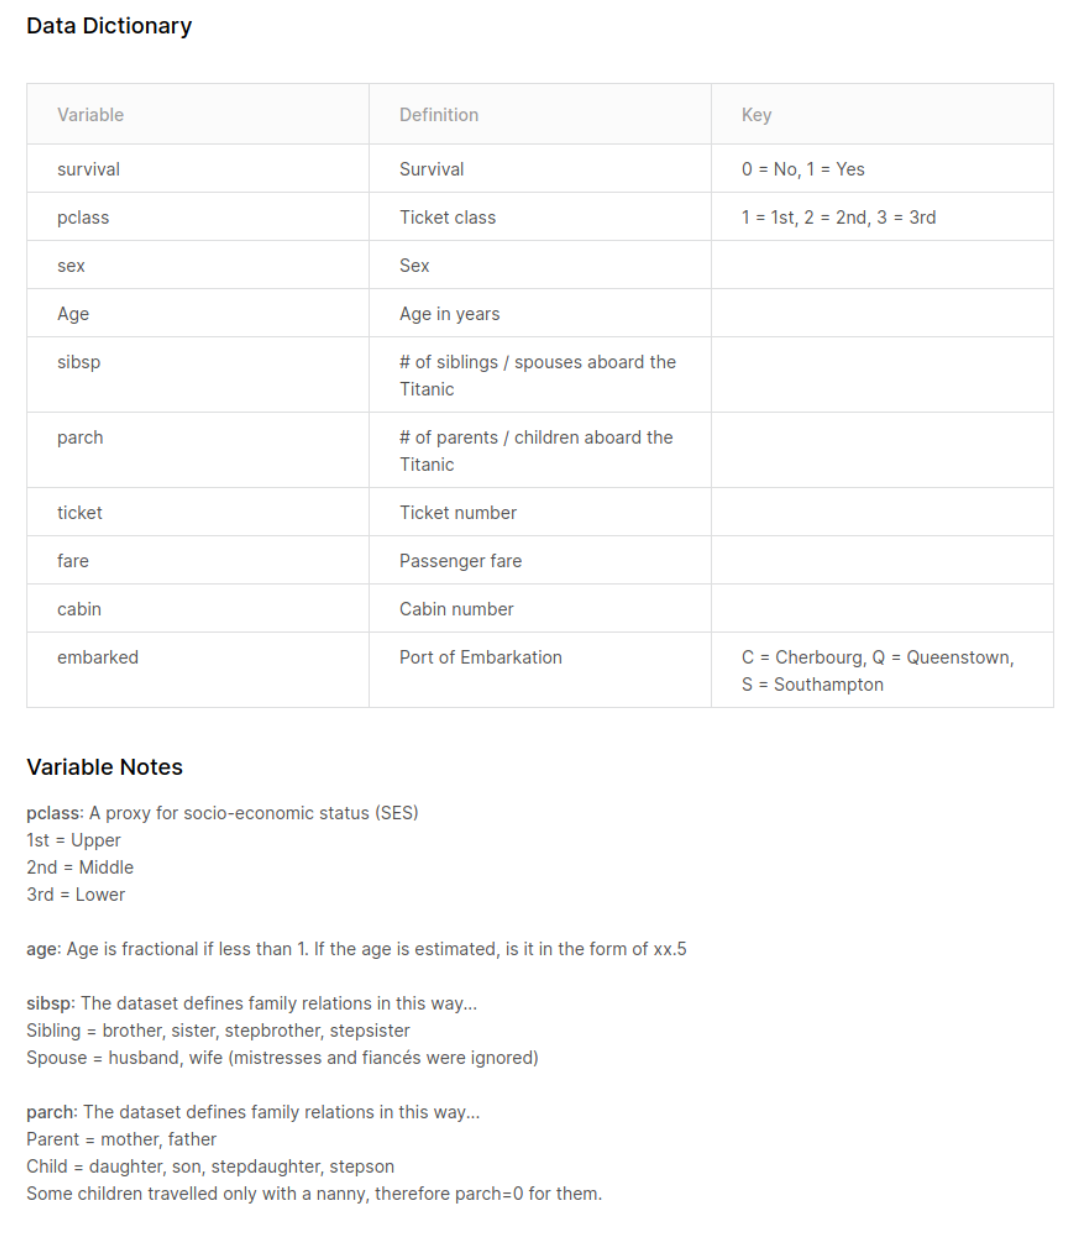

In [14]:
# Import DataSet
titanic_data = pd.read_csv('titanic.csv', na_values=['NA'])
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- I've determined that the following columns don't matter much, and I will drop them

### Determine the number of null values in each column
- This will help me determine which columns just have bad data, and I should consider just dropping instead of trying to impute a bunch of values

In [15]:
def calcNullsForEachColumn(df):
    for column in df:
        nullCount = df[column].isnull().sum()
        print ("column:", column, "has", nullCount, "null values")
calcNullsForEachColumn(titanic_data)

column: PassengerId has 0 null values
column: Survived has 0 null values
column: Pclass has 0 null values
column: Name has 0 null values
column: Sex has 0 null values
column: Age has 177 null values
column: SibSp has 0 null values
column: Parch has 0 null values
column: Ticket has 0 null values
column: Fare has 0 null values
column: Cabin has 687 null values
column: Embarked has 2 null values


#### Let's drop some columns that have bad data...
- Because Cabin has 687 null values, and it likely doesn't even matter, I'm just going to drop it.
- Also because Embarked has 2 values, and likely doesn't matter, I'm just going to drop that column as well.

In [16]:
titanic_data_minimized = titanic_data.drop(['Cabin', 'Embarked'], axis = 1)
print (titanic_data_minimized)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

#### Let's drop some columns that are useless...
- PassengerID does not matter at all
- Ticket Number likely does not matter either
- Name does not matter

In [17]:
titanic_data_minimized = titanic_data_minimized.drop(['PassengerId', 'Ticket', 'Name'], axis = 1)
print (titanic_data_minimized)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0           0       3    male  22.0      1      0   7.2500
1           1       1  female  38.0      1      0  71.2833
2           1       3  female  26.0      0      0   7.9250
3           1       1  female  35.0      1      0  53.1000
4           0       3    male  35.0      0      0   8.0500
..        ...     ...     ...   ...    ...    ...      ...
886         0       2    male  27.0      0      0  13.0000
887         1       1  female  19.0      0      0  30.0000
888         0       3  female   NaN      1      2  23.4500
889         1       1    male  26.0      0      0  30.0000
890         0       3    male  32.0      0      0   7.7500

[891 rows x 7 columns]


## - Deal with NULLs in AGE column
- I could drop all rows that have a NULL Age for now.
    - **However, this could likely be imputed, and likely should be to retain a fair amount**
    - **So this is NOT recommended**
- Imputation
    - From this link https://jamesrledoux.com/code/imputation, it is recommended to use mean or median for imputing these numeric values, that should not be non-zero.
    - In addition, it recommends to impute using median over mean if outliers are present.
        - So let's find out if outliers are present or not in the Age column.

In [18]:
def calcNumOutliers(df):
    numpyArray = df.dropna().values # convert Pandas DataFrame to Numpy Array, and drop NULLs.
    sorted(numpyArray) # Sort it
    q1, q3= np.percentile(numpyArray,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    # count outliers under lower_bound or above upper_bound
    numOutliers = ((lower_bound > numpyArray) | (numpyArray > upper_bound)).sum() 
    return numOutliers

print("Outliers in Age:", calcNumOutliers(titanic_data_minimized["Age"]))

Outliers in Age: 11


- So we can see here, that there are 11 outliers in Age, so I will use Median for the imputing.

In [19]:
medianAge = titanic_data_minimized["Age"].dropna().median()
titanic_data_minimized_Age_median_imputed = titanic_data_minimized.fillna(medianAge)

In [20]:
calcNullsForEachColumn(titanic_data_minimized_Age_median_imputed) 
print(len(titanic_data_minimized_Age_median_imputed), "rows")

column: Survived has 0 null values
column: Pclass has 0 null values
column: Sex has 0 null values
column: Age has 0 null values
column: SibSp has 0 null values
column: Parch has 0 null values
column: Fare has 0 null values
891 rows


In [21]:
titanic_data_minimized_Age_median_imputed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


# - So we can see we now have 891 rows of data, with no null values.

In [22]:
titanic_disc = titanic_data_minimized_Age_median_imputed
titanic_disc.to_csv('titanic_Testing1.csv', index=False)

In [23]:
# < 3: Toddler-Baby
# < 18: Child
# < 65: Adult
# >= 65: Elderly
titanic_disc = titanic_data_minimized_Age_median_imputed
titanic_disc['Age'] = pd.cut(titanic_disc.Age, bins=[0,3,18,65,np.inf], labels=[1,2,3,4])
# low < 20
# medium < 50
# high > 50
titanic_disc['Fare'] = pd.cut(titanic_disc.Fare, bins=[-1,20,50,np.inf], labels=[1,2,3])

In [24]:
# Convert Continuous Age to Discrete
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

# 1 = Male
# 2 = Female

conditions = [
    (titanic_disc['Sex'] == 'male'),
    (titanic_disc['Sex'] == 'female') 
    ]

# create a list of the values we want to assign for each condition
values = [1, 2]

# add a new column "ageStr" which has discrete valued ages.
titanic_disc['SexNum'] = np.select(conditions, values)

# Delete old continues-valued Age column
del titanic_disc['Sex']

# rename "ageStr" column to "Age"
titanic_disc.rename(columns = {'SexNum':'Sex'}, inplace = True) 
print(titanic_disc)

     Survived  Pclass Age  SibSp  Parch Fare  Sex
0           0       3   3      1      0    1    1
1           1       1   3      1      0    3    2
2           1       3   3      0      0    1    2
3           1       1   3      1      0    3    2
4           0       3   3      0      0    1    1
..        ...     ...  ..    ...    ...  ...  ...
886         0       2   3      0      0    1    1
887         1       1   3      0      0    2    2
888         0       3   3      1      2    2    2
889         1       1   3      0      0    2    1
890         0       3   3      0      0    1    1

[891 rows x 7 columns]


In [25]:
# Testing
titanic_disc.to_csv('titanic_Testing2.csv', index=False)

## Split data into Testing (80%) and Training Set (20%) 

## (a) read the inputs train and test ( you can assume two csv files with corresponding names) in the input directory. (5 points)

In [26]:
# export processed and cleaned Data to CSV, and reload

titanic_disc.to_csv('titanic_data_clean.csv', index=False)
titanic_data_clean = pd.read_csv('titanic_data_clean.csv')
print(titanic_data_clean)

     Survived  Pclass  Age  SibSp  Parch  Fare  Sex
0           0       3    3      1      0     1    1
1           1       1    3      1      0     3    2
2           1       3    3      0      0     1    2
3           1       1    3      1      0     3    2
4           0       3    3      0      0     1    1
..        ...     ...  ...    ...    ...   ...  ...
886         0       2    3      0      0     1    1
887         1       1    3      0      0     2    2
888         0       3    3      1      2     2    2
889         1       1    3      0      0     2    1
890         0       3    3      0      0     1    1

[891 rows x 7 columns]


In [27]:
# https://medium.com/themlblog/splitting-csv-into-train-and-test-data-1407a063dd74

# label (data we want to predict)
y = titanic_data_clean.Survived
# features (data which is used to preduct)
X = titanic_data_clean.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\n_train:\n")
print(y_train.head())
print(y_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)


X_train:

     Pclass  Age  SibSp  Parch  Fare  Sex
192       3    3      1      0     1    2
286       3    3      0      0     1    1
857       1    3      0      0     2    1
258       1    3      0      0     3    2
388       3    3      0      0     1    1
(712, 6)

_train:

192    1
286    1
857    1
258    1
388    0
Name: Survived, dtype: int64
(712,)

X_test:

     Pclass  Age  SibSp  Parch  Fare  Sex
703       3    3      0      0     1    1
241       3    3      1      0     1    2
560       3    3      0      0     1    1
661       3    3      0      0     1    1
721       3    2      1      0     1    1
(179, 6)


In [28]:
#result = y_train.iloc[[642],[0]]
for row in X_train.index: 
    print(row, end= " ") 

192 286 857 258 388 127 697 88 333 255 782 307 382 517 54 471 462 673 64 786 553 809 293 279 13 405 110 616 613 694 830 348 586 102 773 184 277 507 145 240 284 16 578 807 1 58 732 411 165 714 717 640 84 750 655 420 589 394 428 863 105 791 459 400 177 419 605 882 838 57 730 324 399 444 89 760 796 124 785 147 688 463 756 424 514 855 372 305 540 334 313 272 854 744 874 868 253 680 457 380 825 731 429 204 753 115 476 448 264 125 392 236 354 33 85 180 541 242 440 654 367 72 844 708 181 780 133 720 30 456 157 824 40 118 423 48 542 831 135 478 674 329 715 845 846 409 107 519 841 800 665 94 325 278 390 564 235 142 617 160 696 799 167 701 228 811 558 364 821 775 224 232 466 538 681 712 464 606 587 308 547 162 549 840 381 340 318 130 46 2 356 886 737 864 814 76 23 556 585 812 175 494 591 66 889 449 718 274 645 123 790 415 378 871 491 709 10 450 171 692 351 451 12 297 182 93 637 873 789 752 827 498 341 704 398 643 174 869 632 310 472 725 572 582 479 319 805 189 470 532 652 823 757 621 512 393 243

# Unfortunately, I built my tree and it's associated helper functions with the X_test and y_test combined, which is not how scikit-learn splits it
- So just to get this working, I'm just going to drop the first 20% rows for my XY_test, and store the first 20% rows for my XY_test.
- This is **NOT A GOOD WAY TO DO THINGS**, and not a good way to split test and train.

In [29]:
# Since I built my decision tree to accept a dataframe that correlates to X_train and y_train, I need to merge these two outputs into one

num_rows = len(titanic_data_clean)

start_20_percent_in = int(round(0.20 * num_rows)) 

get_rid_of_80_percent_from_rear = int(round(0.80 * num_rows)) 

XY_ID3_train = titanic_data_clean[start_20_percent_in:]

print(XY_ID3_train)

XY_ID3_test = titanic_data_clean[:-get_rid_of_80_percent_from_rear]

print(XY_ID3_test)

     Survived  Pclass  Age  SibSp  Parch  Fare  Sex
178         0       2    3      0      0     1    1
179         0       3    3      0      0     1    1
180         0       3    3      8      2     3    2
181         0       2    3      0      0     1    1
182         0       3    2      4      2     2    1
..        ...     ...  ...    ...    ...   ...  ...
886         0       2    3      0      0     1    1
887         1       1    3      0      0     2    2
888         0       3    3      1      2     2    2
889         1       1    3      0      0     2    1
890         0       3    3      0      0     1    1

[713 rows x 7 columns]
     Survived  Pclass  Age  SibSp  Parch  Fare  Sex
0           0       3    3      1      0     1    1
1           1       1    3      1      0     3    2
2           1       3    3      0      0     1    2
3           1       1    3      1      0     3    2
4           0       3    3      0      0     1    1
..        ...     ...  ...    ...    ...

In [30]:
print(y_train)

192    1
286    1
857    1
258    1
388    0
      ..
207    1
50     0
818    0
383    1
751    1
Name: Survived, Length: 712, dtype: int64


# ---------------------------------------
## (c) Build trees of a depth maximum specified as part of invoking the tree building function. A user should be able to specify the max depth. (35 points)

In [31]:
import collections
import sys
from graphviz import Digraph

class ID3:
    __root = None
    ## Private Variables
    __classification_column = None
    __positive_class = None
    __negative_class = None

    # Constructor
    def __init__(self, classification_column, positive_class, negative_class):
        self.__classification_column = classification_column
        self.__positive_class = positive_class
        self.__negative_class = negative_class
        pass

    # -------------------------------
    # -------------------------------
    # -------------------------------
    # Higher Level Functions
    # -------------------------------
    # -------------------------------
    # -------------------------------

    # Return best splitting feature as tuple (String, informationGain)
    def detetrmine_best_splitting_feature (self, df):
            informationGainDict = self.calculate_entropy_of_each_feature(df)
            return self.select_highest_information_gain(informationGainDict)

    # -------------------------------
    # -------------------------------
    # -------------------------------
    
    # xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
    
    # -------------------------------
    # -------------------------------
    # -------------------------------
    # MAIN CALCULATIONS FOR ID3 ALGORITHM
    # -------------------------------
    # -------------------------------
    # -------------------------------
   
    
    # Step 1: Calculate entropy of the dataset itself
    # - It just uses the positive and negative values, and the size of values.
    # https://stackoverflow.com/questions/36067894/pandas-get-count-of-a-single-value-in-a-column-of-a-dataframe
    # -p/(p+n)log_2(p/(p+n)) -n/(p+n)log_2(n/(p+n))
    def calculate_entropy_of_dataset(self, df):
        p = self.get_num_unique_val_in_column(df, self.__classification_column, self.__positive_class)  # get # of positive class (Survived = 1)
        n = self.get_num_unique_val_in_column(df, self.__classification_column, self.__negative_class)  # get # of negative class (Survived = 0)
        if p == 0 or n == 0:  # Entropy will be 0, so return 0 
            return 0
        pFrac = (p) / (p + n)
        nFrac = (n) / (p + n)
        pVal = -1 * pFrac * np.log2(pFrac)
        nVal = -1 * nFrac * np.log2(nFrac)
        entropy = pVal + nVal
        return entropy

      # Traverse columns
    # Select Attributes
    # Computed InformationGain of each Feature (Each column in the database), 
    #   by attribute of set - attributes of value of attribute.

    def calculate_entropy_of_each_feature(self, df):
        # Return information gain dictionary of all attributes
        # This can be further processed to find the best attribute (highest information gain).
        information_gain_dict = {}
        
        # Gets number of values, used for Entropy denominator in entropy calculation.
        col_domain = self.get_number_rows_in_dataframe(df)
        
        # remove 'play-tennis' (or whatever the classification_column is)
        # EX: ['play-tennis', outlook' 'temperature' 'humidity' 'wind'] -> ['outlook' 'temperature' 'humidity' 'wind']
        usable_attributes = df.columns.values
        usable_attributes= usable_attributes[usable_attributes != self.__classification_column]
        #usable_attributes = df.drop([self.__classification_column], axis=1)[column].unique()
        
        ## Traveres Attributes
        for column in usable_attributes:
            
            ## Get unique values that occur in a Columns domain (the rows)
            unique = self.get_unique_values_in_column_as_list(df, column)
            #print("unique values are:", unique)
            
            # Stores the calculation for the Entropy of the Attribute (the column)
            entropy_of_attribute = 0
            
            # Go through each unique value in the attribute we are examining, one at a time.
            for unique_val in unique:  # get one unique value at a time
                
                # Gets the count, the total 
                num_unique = self.get_num_unique_val_in_column(df, column, unique_val)
                
                df_for_unique_val = self.get_unique_values_in_column_that_match_criteria_as_a_dataframe(df, column, unique_val)
                
                # get # of positive class (Survived = 1)
                # EX: p_sunny
                p_val = self.get_num_unique_val_in_column(df_for_unique_val, self.__classification_column, 
                                                          self.__positive_class)  
                
                # get # of negative class (Survived = 0)
                # EX: n_sunny
                n_val = self.get_num_unique_val_in_column(df_for_unique_val, self.__classification_column, 
                                                          self.__negative_class)  
                
                # EX: Entropy(Outlook = Sunny)
                entropy_of_a_val = self.calculate_entropy_of_dataset(df_for_unique_val)  # I_UniqueVal
                
                ## EX: (p_sunny + n_sunny)
                attribute_mult_factor_numerator = (p_val + n_val)
                
                ## EX (p_sunny + n_sunny)/(p + n)
                attribute_mult_factor_for_val = (attribute_mult_factor_numerator) / col_domain
                                
                # EX: (p_sunny + n_sunny)/(p + n) Entropy(Outlook = Sunny) + ...
                entropy_of_attribute += attribute_mult_factor_for_val * entropy_of_a_val
                
                self.calculate_entropy_of_dataset(df)-entropy_of_attribute
            
            if (column != self.__classification_column):
                # add to map of entries in column
                information_gain_dict.update({column: self.calculate_entropy_of_dataset(df) 
                                              - entropy_of_attribute})  
        return information_gain_dict
    
    # Traverse columns
    # Select Attributes
    # Computed InformationGain of each Feature (Each column in the database), 
    #   by attribute of set - attributes of value of attribute.

    def calculate_entropy_of_each_feature_debug(self, df):
        # Return information gain dictionary of all attributes
        # This can be further processed to find the best attribute (highest information gain).
        information_gain_dict = {}
        
        # Gets number of values, used for Entropy denominator in entropy calculation.
        col_domain = self.get_number_rows_in_dataframe(df)
        
        usable_attributes = df.columns.values
        usable_attributes= usable_attributes[usable_attributes != self.__classification_column]
        
        ## Traveres Attributes
        for column in usable_attributes:
            print ("------------")
            print ("column is:", column)
            print ("------------")
            ## Every column except "Survived"
            
            ## Get unique values that occur in a Columns domain (the rows)
            unique = self.get_unique_values_in_column_as_list(df, column)
            print("unique values are:", unique)
            
            # Stores the calculation for the Entropy of the Attribute (the column)
            entropy_of_attribute = 0
            
            # Go through each unique value in the attribute we are examining, one at a time.
            for unique_val in unique:  # get one unique value at a time
                
                # Gets the count, the total 
                num_unique = self.get_num_unique_val_in_column(df, column, unique_val)
                print("num_unique for", unique_val, "is", num_unique)
                
                #frac = num_unique / col_domain
                ## returns a dataframe containing only rows that contain the uniqueVal
                # EX: Only rows that contain "sunny" for Outlook
                                
                df_for_unique_val = self.get_unique_values_in_column_that_match_criteria_as_a_dataframe(df, column, unique_val)
                
                # get # of positive class (Survived = 1)
                # EX: p_sunny
                p_val = self.get_num_unique_val_in_column(df_for_unique_val, self.__classification_column, 
                                                          self.__positive_class)  
                
                # get # of negative class (Survived = 0)
                # EX: n_sunny
                n_val = self.get_num_unique_val_in_column(df_for_unique_val, self.__classification_column, 
                                                          self.__negative_class)  
                
                # EX: Entropy(Outlook = Sunny)
                entropy_of_a_val = self.calculate_entropy_of_dataset(df_for_unique_val)  # I_UniqueVal
                
                ## EX: (p_sunny + n_sunny)
                attribute_mult_factor_numerator = (p_val + n_val)
                
                ## EX (p_sunny + n_sunny)/(p + n)
                attribute_mult_factor_for_val = (attribute_mult_factor_numerator) / col_domain
                
                # informationGainDict.update({uniqueVal:localEntropy}) ## add to map of entries in column
                
                # EX: (p_sunny + n_sunny)/(p + n) Entropy(Outlook = Sunny) + ...
                entropy_of_attribute += attribute_mult_factor_for_val * entropy_of_a_val
                
                #print("\t", unique_val + ",", "entropy:", entropy_of_a_val + ",", "p:",  p_val + ",", "n:", n_val)
                print("\t", unique_val, ",", "entropy:", entropy_of_a_val, ",", "p:",  p_val, ",", "n:", n_val)

                
                #print ("\t\tEntropy of:", column, ":", entropy_of_attribute)
                print ("\t\tInformation Gain of:", column, ":", self.calculate_entropy_of_dataset(df)-entropy_of_attribute)
            
            if (column != self.__classification_column):
                # add to map of entries in column
                information_gain_dict.update({column: self.calculate_entropy_of_dataset(df) 
                                              - entropy_of_attribute})  
        return information_gain_dict

    
    # -------------------------------
    # -------------------------------
    # -------------------------------
    
    # xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

    # -------------------------------
    # -------------------------------
    # -------------------------------
    # Helper Methods:
    # -------------------------------
    # -------------------------------
    # -------------------------------

    
    
    # Return best splitting feature as tuple (String, informationGain)
    def detetrmine_mode_output_of_dataframe_column (self, df, column):
            storage_list = ["", -1]
            unique_values = self.get_unique_values_in_column_as_list(df, column)
            # calculate the count, store in output_tuple, find max
            for unique_val in unique_values:
                #print("unique val is:", unique_val)
                count = self.get_num_unique_val_in_column(df, column, unique_val)
                if (count > storage_list[1]):
                    storage_list[0] = unique_val
                    storage_list[1] = count
            return storage_list[0]
    
    
    # given dictionary of rankings, return best information gain tuple.
    def select_highest_information_gain(self, dictionary):
        value = None
        maxInformationGain = 0
        for key in dictionary:
            if (dictionary[key] > maxInformationGain):
                value = key
                maxInformationGain = dictionary[key]
        return (value, maxInformationGain)

        # Step 2: Calculate the Information Gain for Each Attribute
        # https://stackoverflow.com/questions/16333296/how-do-you-create-nested-dict-in-python
        #@staticmethod

    def get_number_rows_in_dataframe(self, df):
        return len(df)

    def split_dataframe_for_the_unique_value_branches_as_a_tuple(self, df, column, unique_values):
        dataframes_in_list = []
        for unique_value in unique_values:
            dataframes_in_list.append(self.get_unique_values_in_column_that_match_criteria_as_a_dataframe(df, column, unique_value))
        dataframes_in_tuple = tuple(dataframes_in_list)
        return dataframes_in_tuple
    
    
    def get_unique_values_in_column_as_list(self, df, column):
        unique = df[column].unique()  # unique values in column
        return unique
    

    # EX: With Parameters: (playtennis, "outlook", "sunny")
    '''
        play-tennis outlook temperature humidity    wind
    0             0   sunny         hot     high    weak
    1             0   sunny         hot     high  strong
    7             0   sunny        mild     high    weak
    8             1   sunny        cool   normal    weak
    10            1   sunny        mild   normal  strong
    '''
    def get_unique_values_in_column_that_match_criteria_as_a_dataframe(self, df, column, unique_val):
        #unique = (df[column] == unique_val)
        unique_values_in_column = df.loc[df[column] == unique_val]
        return unique_values_in_column
    
    ## df: dataframe, dataset
    ## column: string, representing column name
    ## unique_val: int, represents value we want to find the rows for
    
    ## This function extracts a column of values
    ## Then it extracts a column of values, such that the values only match the unique_val
    ## Then this subset column is summed, and the domain is returned (the number of elements)
    def get_num_unique_val_in_column(self, df, column, unique_val):
        numUnique = (df[column] == unique_val).sum()
        return numUnique



    def setRoot(self, root):
        self.__root = root

    def getRoot(self):
        return self.__root

    def leaf(self, df):
        uniqueVals = df[self.__classification_column].unique()
        print(uniqueVals)
        if (len(uniqueVals) == 1):
            return (True, uniqueVals[0])
        else:
            return (False, 0)
        
    ## EX: if root has id of 57, and two children have id of 58 & 59:
    ## [[57, 58], [57, 59]]
    def generate_edges(self, root):
        output=[]  
        for child in root.get_branches():
            output.append([str(root.get_unique_id()), str(child.get_unique_id())])
        return output

        
    #----------------------------------------------------
    # Tree Building:
    # - Get a dataframe.
    #    - Compute Entropy of Set
    #    - Compute Entropy of features
    #    - Compute best feature and information gain, choose that feature for your split
    
    # - Split n-partitioned dataframes to fulfill split based on the features
    #    - add n-branches to the current decision tree root node
    #      - On each of these branches, call buildDecisionTree on each child, 
    #         and pass in the associated splitted dataframe for that child value
     
    
    
    ## Create root node, then call helper to recurse for the rest of the tree
    ## attribute: best feature for information gain of that df
    ## label: choise that was made previously to get to that location
     

    ## create root node
    def build_decision_tree(self, df, id3, depth=0, root=None, maxDepth=sys.maxsize):

        ## Compute best feature to split on
        best_feature_to_split_on_tuple = self.detetrmine_best_splitting_feature(df)
        best_feature_to_split_on_name = best_feature_to_split_on_tuple[0]

        ## If the top node in tree is a leaf.
        if best_feature_to_split_on_name is None: ## Leaf Node
            # Get Classification Value (EX 1 or 0)
            best_feature_to_split_on_leaf_classification = self.detetrmine_mode_output_of_dataframe_column(df, self.__classification_column)
            root.set_attribute(best_feature_to_split_on_leaf_classification)
            root.set_is_leaf(True) ## toggle that it is a leaf
            
        elif depth != maxDepth:  # not leaf & not depth restricted
            # Set Root attributes to best_feature (column) in dataframe.
            root = DecisionNode(best_feature_to_split_on_name)
            root.set_label(best_feature_to_split_on_name) # EX: "Sunny"

            # Get unique values in dataframe best_feature column. Each unique value will become a child.
            # Traverse branches, call child.bulid_tree_helper(child)
            branches = self.get_unique_values_in_column_as_list(df, best_feature_to_split_on_name)
            for unique_val in branches:
                # assign child label to their unique_val (the choice made to reach them)
                child = DecisionNode("child") ## create child
                # Get Child Datafram
                child_dataframe = self.get_unique_values_in_column_that_match_criteria_as_a_dataframe(df, best_feature_to_split_on_name, unique_val)
                child = id3.build_decision_tree(child_dataframe, id3, (depth + 1), child) # build out tree of branch
                child.set_label(unique_val) # EX: "Sunny"
                root.add_branch(child) ## add built-out branches
        return root
    


    
    def print_tree_in_order(self, node, depth = 0):
        #print("printing")
        prefix = ""
        if (depth > 0):
            prefix = ' ' * 3 * depth + "|" + "---" + str(node.get_label())  + "---"
        if (node is None):
            return
        print (prefix, str(node.get_attribute()), str(node.get_unique_id()))
        #print ("leaf",  node.get_is_leaf())
        if (not node.get_is_leaf()): # internal node
            #print("if")
            for val in node.get_branches(): # traverse branches
                self.print_tree_in_order(val, (depth+1))

    # https://graphviz.readthedocs.io/en/stable/manual.html
    def create_visual_of_tree(self, node):
        digraph = Digraph(comment='The Round Table')
        self.create_visual_of_tree_helper(node, digraph)        
        digraph.render('tree', view=True)     
        
    # if not leaf (internal node)
    #  - create node of root using id
    #    - compute: [["root.id", "child.id", ["root.id", "child2.id"]]]
    #       - (Get all branches, m)
    def create_visual_of_tree_helper(self, root, digraph):
        if (root is None):
            return
        if (not root.get_is_leaf()): # internal node
            #print (root.get_unique_id())
            #print (root.get_attribute())
            digraph.node(str(root.get_unique_id()), root.get_attribute())
            children = root.get_branches()
            for child in children: # create child nodes
                digraph.node(str(child.get_unique_id()), str(child.get_attribute()))
                digraph.edge(str(root.get_unique_id()), str(child.get_unique_id()), str(child.get_label()))
            for child in root.get_branches(): # traverse branches
                self.create_visual_of_tree_helper(child, digraph)
                
                
    # EX: Each node is a column
    ## Take that column, extract just that column, find which brach matches the decision in your column
    ## Then do the same thing, but then change root
    
    ## OUR DATAFRAME CAN REMAIN THE ROW THE ENTIRE TIME, WE"RE JUST MOVING THE ROOT, AND CHANGING OUR QUERY
    ## BASED ON THE ATTRIBUTE IN THE ROOT.
    def classify_value(self, root, row_to_classify):
        if (root is None):
            return
        if (not root.get_is_leaf()): # internal node
            # Get Column we're at (Root attribute)
            column = root.get_attribute()
            # Get column value from row_to_classify
            value = self.get_unique_values_in_column_as_list(row_to_classify, column)[0]
            
            ## make a list
            branches = root.get_branches()
            length = len(branches)
            found_branch = False
            i = 0
            child = None
            while (not found_branch and i < length):
                branch = branches[i]
                i += 1
                if (branch.get_label() == value):
                    found_branch = True
                    child = branch
            
            return self.classify_value(child, row_to_classify)
            
        else: # leaf (this is our classification value to return)
            return root.get_attribute()

    ## outputs list
    ## (classification)

    def classify_values_output_list(self, root, data_to_classify):
        output = []
        for i in range(0, len(data_to_classify)):
            row = data_to_classify.loc[i : i]
            classification = id3Titanic.classify_value(root, row)
            output.append(classification)
        return output  
    
    def classification_values_output_list_old(self, root, data_to_classify):
        num_rows = len(data_to_classify)
        output_list = []
        for i in range(1, num_rows+1):
            row_to_classify = titanic_data_clean.loc[i : i]
            classification = self.classify_value(root, row_to_classify)
            output_list.append(classification)
        return output_list
    

        


    def selfToStr(self, indent=0):
        print(self)


In [32]:
# Node of ID3 Decision Tree
class DecisionNode:
    ## class variables:
    unique_id = 0
    
    ## Private Variables
    __attribute = None  # Attribute (EX: 'Age')
    __branches = []     # Branches (Other Columns (Internal Nodes), or Discrete Classification Value (Leaf))
    __is_leaf = False
    __label = ""      # label of lines on current node with parent (Choice made in split made to get new subset)
    __unique_id = 0 # used for graphing tree
    
    # Constructor
    def __init__(self, attribute=None):
        self.__attribute = attribute  
        self.__branches = [] 
        self.__is_leaf = False
        self.__label = ""  
        self.__unique_id = DecisionNode.unique_id
        DecisionNode.unique_id += 1

    # --------------------
    # Getters and Setters:
    # --------------------
    def get_attribute(self):
        return self.__attribute
    def set_attribute(self, attribute):
        self.__attribute = attribute

    def get_branches(self):
        return self.__branches

    def add_branch(self, branch):
        self.__branches.append(branch)

    def get_is_leaf(self):
        return self.__is_leaf

    def set_is_leaf(self, is_leaf):
        self.__is_leaf = is_leaf

    def get_label(self):
        return self.__label

    def set_label(self, label):
        self.__label = label
        
    def get_unique_id(self):
        return self.__unique_id

# ------------------------------
# My ID3 Tree:

# (c) Build trees of a depth maximum specified as part of invoking the tree building function. A user should be able to specify the max depth. (35 points)
- (Note, this does not support specifying depth)

In [33]:
# BUILD TREE
id3Titanic = ID3("Survived", 1, 0)
titanic_tree = id3Titanic.build_decision_tree(XY_ID3_train, id3Titanic)

# (d) output the learned tree as a both object code and as a visual interpretable model. (20 points)

In [34]:
# save the model to disk
filename = 'finalized_ID3_decision_tree_mode.sav'
pickle.dump(titanic_tree, open(filename, 'wb'))

In [35]:
# load the model from disk
titanic_tree = pickle.load(open(filename, 'rb'))

In [36]:
# Build Visual of Tree:
# outputs to tree.pdf
id3Titanic.create_visual_of_tree(titanic_tree)

# (e) output a confusion matrix from the constructed tree on the test set. Compute accuracy, precision, recall and obtain an AUC plot of the classifier ( you don’t have to code the plotting functions). You can reuse any library but you have to output the data in a way that the plotting function can be invoked. (5 points)

In [37]:
# Classification (training) Results:
def classify_more(root, data_to_classify):
    output = []
    for i in range(0, len(data_to_classify)):
        row = data_to_classify.loc[i : i]
        classification = id3Titanic.classify_value(root, row)
        output.append(classification)
        #print (classification)
    return output    
trained_output = classify_more(titanic_tree, XY_ID3_test)
# Get rid of None's that appear (this is a hack) - I'm not sure why None's are appearing
trained_output = [99 if v is None else v for v in trained_output]

print (trained_output)


print(len(trained_output))

[0, 1, 1, 1, 0, 0, 0, 99, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 99, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 99, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 99, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 99, 0, 1, 0, 0, 0, 0, 0, 0, 99, 1]
178


In [38]:
# Actual Data
test_output = XY_ID3_test["Survived"].to_list()

print(list)
#print(len(list))

<class 'list'>


In [39]:
'''
# True/False is related your classification (the prediction)
# I.E., if it's False, you predicted it wrong.
# Positive/Negative maps to the real world instance.
TP = True Positive: Actual = 1, Predicted = 1
TN = True Negative: Actual = 0, Predicted = 0
FP = False Positive: Actual = 1, Predicted = 0
 - EX: They survived on Titanic but you guessed they died, where 1 = survived.
FN = False Negative: Actual = 0, Predicted = 1
'''

def comp_TP_TN_FP_FN(y_test, y_pred):
    TP = TN = FP = FN = 0
    
    for i in range (len(y_test)):
        if (y_test[i] == 1 and y_pred[i] == 1): ## True Positive
            TP += 1
        if (y_test[i] == 0 and y_pred[i] == 0): ## True Negative
            TN += 1
        if (y_test[i] == 1 and y_pred[i] == 0): ## False Positive
            FP += 1
        if (y_test[i] == 0 and y_pred[i] == 1): ## False Negative
            FN += 1
    return(TP, TN, FP, FN)
    

In [40]:
model_eval = comp_TP_TN_FP_FN(test_output, trained_output)
TP = model_eval[0]
TN = model_eval[1]
FP = model_eval[2]
FN = model_eval[3]

print("-----------------")
print ("My ID3 Tree Statistics:")
print("-----------------")

# Print Confusion Matrix
print ("[", TP, ",", FN, "]")
print ("[", FP, ",", TN, "]")




## (TP)/(TP + FP)
def calc_precision(model_eval):
    tp = model_eval[0]
    fp = model_eval[2]
    return (tp)/(tp + fp)

print ("precision is:", calc_precision(model_eval))

## (TP+TN)/(TP + TN + FP + FN)
def calc_accuracy(model_eval):
    tp = model_eval[0]
    tn = model_eval[1]
    fp = model_eval[2]
    fn = model_eval[3]
    return (tp + tn)/(tp + tn + fp + fn)

print ("accuracy is:", calc_accuracy(model_eval))

## (TP)/(TP+FN)
def calc_true_positive_rate(model_eval):
    tp = model_eval[0]
    fn = model_eval[3]
    return (tp)/(tp + fn)

decision_tree_tpr = calc_true_positive_rate(model_eval)
print ("true positive rate (Recall) is:", decision_tree_tpr)



## (TP)/(TN+FP)
def calc_false_positive_rate(model_eval):
    tp = model_eval[0]
    tn = model_eval[1]
    fp = model_eval[2]
    return (tp)/(tn + fp)

decision_tree_fpr = calc_false_positive_rate(model_eval)
print ("false positive rate is:", decision_tree_fpr)

-----------------
My ID3 Tree Statistics:
-----------------
[ 41 , 20 ]
[ 18 , 93 ]
precision is: 0.6949152542372882
accuracy is: 0.7790697674418605
true positive rate (Recall) is: 0.6721311475409836
false positive rate is: 0.36936936936936937


# ---------------------------------
# SCIKIT-LEARN TREE!!!!

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier_scikit = DecisionTreeClassifier()
classifier_scikit.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
classifier_scikit.score(X_test, y_test)

0.7877094972067039

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("---------------------------")
print("Scikit-Learn Tree:")
y_pred_scikit = classifier_scikit.predict(X_test)
print("Confusion Matrix (below):")
print(confusion_matrix(y_test, y_pred_scikit))
print("Accuracy score: ", accuracy_score(y_test, y_pred_scikit))
print("Precision score: ", precision_score(y_test, y_pred_scikit))
print("Recall score: ", recall_score(y_test, y_pred_scikit))
print("---------------------------")


---------------------------
Scikit-Learn Tree:
Confusion Matrix (below):
[[84 18]
 [20 57]]
Accuracy score:  0.7877094972067039
Precision score:  0.76
Recall score:  0.7402597402597403
---------------------------


In [44]:
# ROC PLOT
#classifier_scikit.decision_function(X_test)

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
#r_auc = roc_auc_score(Y_test, r_probs)
scikit_probs = classifier_scikit.predict_proba(X_test)
scikit_probs = scikit_probs[:, 1] # keep the positive outcomes
scikit_auc = roc_auc_score(y_test, scikit_probs)
print('SCIKIT: AUROC = %.3f' % (scikit_auc))
# fpr and tpr will be used to create the ROC curve
scikit_fpr, scikit_tpr, _ = roc_curve(y_test, scikit_probs)

SCIKIT: AUROC = 0.856


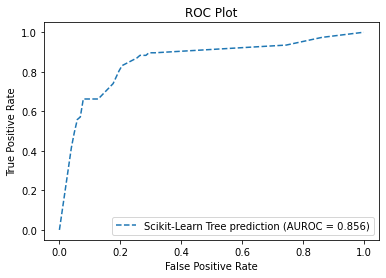

In [46]:
import matplotlib.pyplot as plt
plt.plot(scikit_fpr, scikit_tpr, linestyle='--', label='Scikit-Learn Tree prediction (AUROC = %0.3f)' % scikit_auc)

# my tree:
#plt.plot(decision_tree_fpr, decision_tree_tpr, linestyle='--', label='My ID3 Decision Tree prediction')


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
# Show plot
plt.show()

# (g) Compare your coded tree’s metrics with the standard sklearn decision tree implementation and discuss why it is similar or dissimilar. (5 points)

### - The values for Sci-kit learn are:

```
Scikit-Learn Tree:
Confusion Matrix (below):
[[95 12]
[28 44]]
Accuracy score:  0.776536312849162
Precision score:  0.7857142857142857
Recall score:  0.6111111111111112
```

### - The values for my ID3 tree are:

```
-----------------
My ID3 Tree Statistics:
-----------------
[ 41 , 20 ]
[ 18 , 93 ]
precision is: 0.6949152542372882
accuracy is: 0.7790697674418605
true positive rate (Recall) is: 0.6721311475409836
false positive rate is: 0.36936936936936937
````
## OK, so what?
- It should be noted that sci-kit learn uses the random split of data, my ID3 uses bottom 80% for training, top 20% for testing.
- So while they are using the same original dataset, the testing and training sets used will be slighly different.

- However, if we just look at the statistics given:
  - We can see that my tree is slightly more accurate than the SciKit learn tree (0.779 vs 0.776)
  - However, my tree is a little less precise (0.695 vs 0.785)
  - However, my recall score is better than Scikit's (0.672 vs 0.6111)
    


